# 손실함수 
* 평균제곱오차

In [2]:
import numpy as np
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


# ex1 '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mse = mean_squared_error(np.array(y), np.array(t))
print(mse)

0.09750000000000003


In [4]:
# ex2 '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mse = mean_squared_error(np.array(y), np.array(t))
print(mse)

0.5975


* 교차 엔트로피 오차

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7  # 0일때 -무한대가 되지 않기 위해 작은 값을 더함
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cee = cross_entropy_error(np.array(y), np.array(t))
print(cee)  # 0.510825457099
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cee = cross_entropy_error(np.array(y), np.array(t))
print(cee)  # 2.30258409299

0.510825457099338
2.302584092994546


# 미니배치 학습

In [6]:
import numpy as np
import sys
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=False)

print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # 원-핫 인코딩 된 정답 레이블 (60000, 10)

(60000, 784)
(60000,)


In [7]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t])) / batch_size


# 수치 미분

In [8]:
import numpy as np
import matplotlib.pylab as plt

def numerical_diff(f, x):
    h = 10e-4
    return (f(x + h) - f(x - h)) / (2 * h)

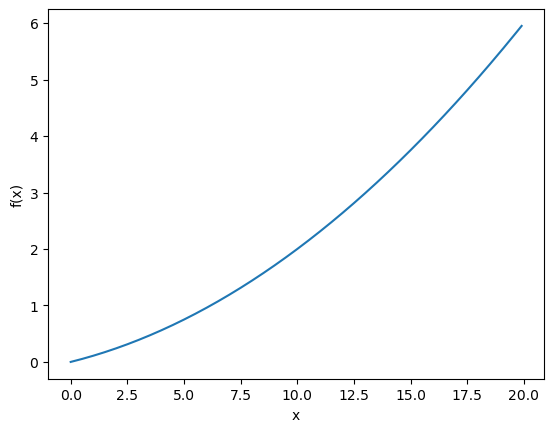

In [9]:
def function_1(x):
    return 0.01*x**2 + 0.1*x


x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 간격 0.1인 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

In [10]:
print(numerical_diff(function_1, 5))   # 0.200000000000089
print(numerical_diff(function_1, 10))

0.200000000000089
0.29999999999996696


* 편미분

In [11]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)

In [12]:
# x0 = 3, x1 = 4일 때, x0에 대한 편미분을 구하라.
def function_tmp1(x0):
    return x0**2 + 4.0**2.0


# x0 = 3, x1 = 4일 때, x1에 대한 편미분을 구하라.
def function_tmp2(x1):
    return 3.0**2.0 + x1 * x1


print(numerical_diff(function_tmp1, 3.0))  # 5.999999999998451
print(numerical_diff(function_tmp2, 4.0))  # 8.000000000000895

5.999999999998451
8.000000000000895


# 기울기

In [51]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 값 복원

    return grad


def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)


print(numerical_gradient(function_2, np.array([3.0, 4.0])))  # [ 6.  8.]
print(numerical_gradient(function_2, np.array([0.0, 2.0])))  # [ 0.  4.]
print(numerical_gradient(function_2, np.array([3.0, 0.0])))  # [ 6.  0.]

[6. 8.]
[0. 4.]
[6. 0.]


# 경사하강법

In [40]:
# f:최적화하려는 함수
# init_x : 초깃값
# lr : 학습률
# step_num : 반복횟수
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x) # 기울기 참
        x -= lr * grad

    return x, np.array(x_history)


In [41]:
# 경사법으로 f(x0, x1) = x0² + x1²의 최솟값을 구해라
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1)
print(x)  # [ -6.11110793e-10   8.14814391e-10]

# 학습률이 너무 큼
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=10.0)
print(x)  # [ -2.58983747e+13  -1.29524862e+12] 발산함

# 학습률이 너무 작음
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=1e-10)
print(x)  # [-2.99999994  3.99999992] 거의 변화 없음

[-6.11110793e-10  8.14814391e-10]
[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


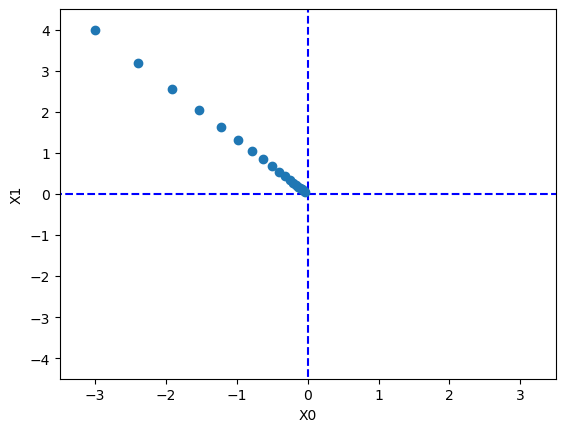

In [42]:
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1, step_num=20)

plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [63]:
import sys
import os
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


# 4.4.2 신경망에서의 기울기
class simpleNet:
    """docstring for simpleNet"""
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss


net = simpleNet()
print(net.W)  # 가중치 매개변수(랜덤)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))  # 최댓값의 인덱스

t = np.array([0, 0, 1])  # 정답 레이블
print(net.loss(x, t))

def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.71286268 -0.47525369  0.16779726]
 [-0.07980532  0.4826064   0.50717728]]
[0.35589282 0.14919354 0.55713791]
2
0.9093579054123646
[[ 0.19761618  0.16071416 -0.35833034]
 [ 0.29642427  0.24107124 -0.53749551]]


# 학습 알고리즘 구현하기

In [64]:
import sys
import os
import numpy as np
sys.path.append(os.pardir)
from common.functions import sigmoid, softmax, cross_entropy_error
from common.gradient import numerical_gradient

class TwoLayerNet:
    # 초기화를 수행한다.
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측(추론)을 수행한다.
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # 손실 함수의 값을 구한다.
    # x : 입력데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    # 정확도를 구한다.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # 가중치 매개변수의 기울기를 구한다.
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads


In [65]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)  # (784, 100)
print(net.params['b1'].shape)  # (100,)
print(net.params['W2'].shape)  # (100, 10)
print(net.params['b2'].shape)  # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [66]:
x = np.random.rand(100, 784)  # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)   # 더미 정답 레이블(100장 분량)
grads = net.numerical_gradient(x, t)  # 기울기 계산
# 주의 : 실행하는데 아주 오래걸림
print(grads['W1'].shape)  # (784, 100)
print(grads['b1'].shape)  # (100,)
print(grads['W2'].shape)  # (100, 10)
print(grads['b2'].shape)  # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


* 미니배치 학습 구현하기

In [ ]:
import numpy as np
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=False)

# 하이퍼 파라메터
iters_num = 1000  # 반복횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    print(i)
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)  # 다음 장에서 구현할 더 빠른 방법!

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
     # 1에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
        t_train = np.eye(10)[t_train]  # t_train은 1차원 배열이라고 가정합니다.
        t_test = np.eye(10)[t_test]  # t_test는 1차원 배열이라고 가정합니다.
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "
              + str(train_acc) + ", " + str(test_acc))
    print(train_loss_list)